In [ ]:
# Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
# Оставьте два признака -sepal_length и sepal_width и целевую переменную - variety
# Разделите данные на выборку для обучения и тестирования
# Постройте модель LDA
# Визуализируйте предсказания для тестовой выборки и центры классов
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [2]:
# Взял необходимый датасет, оставил нужные признаки и целевую переменную target (я так понял, в задании опечатка, т.к. переменной variety в датасете не нашлось)

iris = load_iris()

iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data = iris_data.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

iris_target = iris['target']

In [3]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
# Разделил данные на обучающую и тестовую выборки:

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.25, random_state=43)


In [5]:
# Модель LDA:

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

res = pd.DataFrame([y_test, lda.predict(X_test)]).T

predict_accuracy = accuracy_score(y_test, lda.predict(X_test))

predict_accuracy

0.8157894736842105

In [6]:
# Как видно, точность предсказания составляет 81,5%, что является достаточно высоким показателем. Однако если взять все параметры из выборки (sepal length, sepal width, petal length, petal width), то точность предсказания 
# будет равна 100%.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


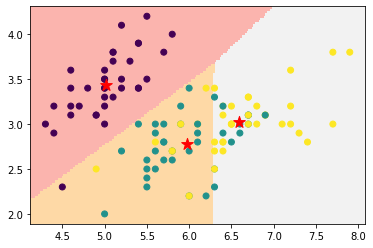

In [7]:
# Визуализация тренировочных данных:

# Точечный график:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)

# Центры классов:
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# Сетка:
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

# Предсказание класса каждой точки сетки:
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Закрашивание классов разными цветами:
plt.pcolormesh(xx, yy, Z, cmap='Pastel1', zorder=-1)
#
plt.show()

In [8]:
# Как видно из графика, точность предсказания типа цветка 0 (Setosa) достаточно высока, все случаи цветка типа 0 расположены явно отдельно от двух остальных видов цветов, за исключением одного случая. 
# Виды цветков 1(Versicolor) и 2(Virginica) расположены на графике более тесно, с наличием наложений; по всей видимости, у обученной системы недостаточно данных для более точной идентификации тех случаев, 
# которые расположены погранично, либо накладываются на другой вид цветка. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


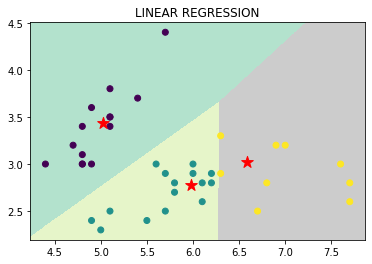

In [9]:
# Визуализация тестовых данных:

plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.title('LINEAR REGRESSION')
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 2000, 1000
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='Pastel2', zorder=-1)

plt.show()

In [10]:
# Судя по точечному графику, системе удалось более четко разграничить данные из тестового диапазона - определяются лишь 2 случая цветка №2 (Virginica), расположенных непосредственно на границе с цветком 1 (Versicolor)

In [11]:
# КЛАСТЕРИЗАЦИЯ:

In [12]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(x_scaled)

x_scaled

array([[ 0.15284988, -2.01183468],
       [-0.34335844, -0.16868144],
       [-0.34335844, -1.32065222],
       [-0.09525428, -0.8598639 ],
       [-0.46741052, -1.55104637],
       [ 1.02121445, -0.16868144],
       [-1.58387924,  1.2136835 ],
       [-0.21930636, -0.62946975],
       [-0.46741052, -1.09025806],
       [-0.21930636, -1.09025806],
       [ 1.02121445,  0.06171272],
       [ 0.52500613,  0.52250103],
       [ 0.52500613, -1.32065222],
       [-0.09525428, -0.8598639 ],
       [ 1.02121445,  0.06171272],
       [-0.09525428, -0.8598639 ],
       [-0.5914626 ,  0.75289519],
       [-1.211723  , -1.32065222],
       [ 2.26173525, -0.16868144],
       [-1.08767092,  0.98328934],
       [ 0.15284988, -0.8598639 ],
       [ 0.64905821,  0.29210688],
       [-0.09525428, -1.09025806],
       [-1.08767092,  1.2136835 ],
       [-1.211723  ,  0.06171272],
       [ 0.77311029, -0.62946975],
       [ 1.51742277, -0.16868144],
       [ 1.26931861,  0.06171272],
       [-1.8319834 ,

In [13]:
clusters

array([0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1,
       0, 0], dtype=int32)

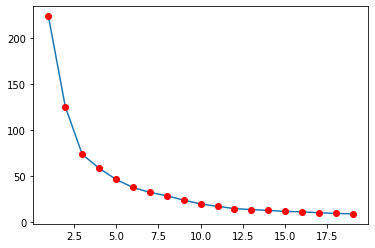

In [14]:
# Подбор оптимального числа кластеров для алгоритма kmeans и его визуализация:

k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(x_scaled)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')
plt.show()

In [15]:
# На графике отмечается значительное снижение кривой до уровня примерно х=3, после чего наблюдается ее плавное уплощение, 
# что не противоречит заранее известным нам данным, о том, что кластеров должно быть 3 (так как у нас 3 вида цветков)

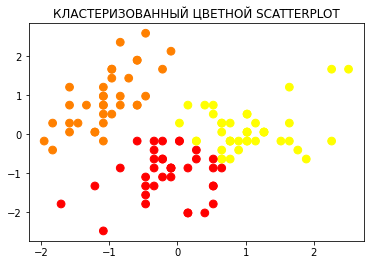

In [16]:
# Визуализация кластеров:

plt.scatter(x=x_scaled[:, 0], y=x_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.title('КЛАСТЕРИЗОВАННЫЙ ЦВЕТНОЙ SCATTERPLOT')
plt.show()